<h1> Isra COVID 19 </h1>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("isracovid200322.csv")
df1 =df.drop(df.tail(1).index)

In [4]:
print(df1.head())
df1.shape


   day  cases
0    1      1
1    2      1
2    3      2
3    4      2
4    5      2


(29, 2)

In [5]:
xs = df1["day"]
ys = df1["cases"]

In [6]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer



In [7]:
# General Functions
def func_exp(x, a, b, c):
    """Return values from a general exponential function."""
    return a * np.exp(b * x) + c


def func_log(x, a, b, c):
    """Return values from a general log function."""
    return a * np.log(b * x) + c



In [8]:

transformer = FunctionTransformer(np.log, validate=True)

In [9]:
xs = xs.values.reshape(-1,1)
ys = ys.values.reshape(-1,1)
y_trans = transformer.fit_transform(ys)

In [10]:
model = LinearRegression().fit(xs, y_trans)  

In [11]:
coeff=model.coef_
coeff=np.exp(coeff)
coeff

array([[1.27585785]])

In [12]:
y_fit = model.predict(xs)

Text(0.5, 1.0, 'COVID 19  model for Israel')

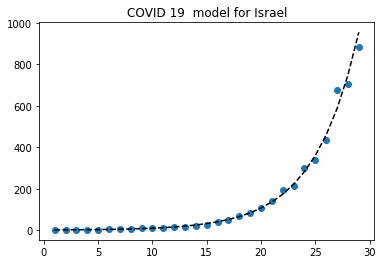

In [13]:
plt.scatter(xs, ys)
plt.plot(xs, np.exp(y_fit), "k--", label="Fit")     # 3
plt.title("COVID 19  model for Israel")

In [14]:
np.exp(model.predict([[29]]))

array([[955.74493297]])

In [15]:
def predict(day):
    return np.exp(model.predict(np.array([day]).reshape(-1,1)))[0][0]

In [16]:
for x in range(10,15):
    print("{:.0f} :  {:.1f}".format(x,predict(x) ) )

10 :  9.3
11 :  11.9
12 :  15.2
13 :  19.4
14 :  24.7


In [17]:
19.4 * coeff

array([[24.75164237]])

In [18]:
for x in range(0,20):
    print(str(x+1) + " " + str(ys[x]))



1 [1]
2 [1]
3 [2]
4 [2]
5 [2]
6 [3]
7 [7]
8 [7]
9 [10]
10 [12]
11 [12]
12 [15]
13 [17]
14 [21]
15 [25]
16 [39]
17 [50]
18 [70]
19 [82]
20 [109]
